# Homework 1 Problem 1.2

There are of course "many ways to skin a cat", as the unpleasant saying goes, but here are two free alternatives to using Mathematica on your own system to help you with some of the tricky bits in solving your homework integrals. 

We are trying to get an answer for the integral:
$$I =\int_{-\infty}^{\infty} A e^{-\lambda\left(x-a\right)^2}dx$$

One way to get the answer is to ask Wolfram Alpha: `Integrate[A E^(-l (-a + x)^2), {x, -Infinity, Plus[Infinity]}]` or `integrate from -infinity to +infinity A*exp(-l*(x-a)**2)`, which indeed provides the answer. 

The other way is to use sympy, which has documentation here: [Sympy](http://docs.sympy.org/latest/index.html)

First, import sympy, and since we want to plot the function, also import matplotlib.pyplot.


In [1]:
from sympy import *
import matplotlib.pyplot as plt

Next, we want to tell sympy what symbols we want to use, and that we have a function `rho(x)` which we will integrate. An important part is to tell sympy the assumption that all the variables are real numbers, and that lambda (`lam`) is postitive. If we don't do this step, the output will be hard to read because of all the conditions on the integral.

In [2]:
A, lam, a, x = symbols("A lam a x",real=True)
assumptions.assume.global_assumptions.add(Q.positive(lam))
rho = Function('rho')(x)
rho = A*exp(-lam*(x-a)**2)

We now integrate the function from minus to plus infinity:

In [3]:
integrate(rho,(x,-oo,oo))

Piecewise((sqrt(pi)*A/sqrt(lam), Abs(periodic_argument(lam, oo)) <= pi/2), (Integral(A*exp(-lam*(-a + x)**2), (x, -oo, oo)), True))

So the answer we got for the integral is 
$$ \frac{\sqrt{\pi} A}{\sqrt{\lambda}}$$
We want to equate this to 1, and then solve for $A$, which gives us:
$$ A = \sqrt{\frac{\lambda}{\pi}}$$
We redefine rho so that A is eliminated. Note that this is easier than requesting sympy to substitute for A all the time.

In [4]:
rho = sqrt(lam/pi)*exp(-lam*(x-a)**2)

We can now do the rest of the homework. Integrate x*rho and x*x*rho:
$$\left< x \right> = \int_{-\infty}^\infty x \sqrt{\frac{\lambda}{\pi}}e^{-\lambda(x-a)^2} dx$$
$$\left< x^2 \right> = \int_{-\infty}^\infty x^2 \sqrt{\frac{\lambda}{\pi}}e^{-\lambda(x-a)^2} dx$$

In [5]:
print integrate(x*rho,(x,-oo,oo))
print integrate(x*x*rho,(x,-oo,oo))

Piecewise((a, (Abs(periodic_argument(lam, oo)) <= pi/2) & (Abs(periodic_argument(lam, oo)) < pi/2)), (Integral(sqrt(lam)*x*exp(-lam*(-a + x)**2)/sqrt(pi), (x, -oo, oo)), True))
Piecewise((a**2 + 1/(2*lam), (Abs(periodic_argument(lam, oo)) <= pi/2) & (Abs(periodic_argument(lam, oo)) < pi/2)), (Integral(sqrt(lam)*x**2*exp(-lam*(-a + x)**2)/sqrt(pi), (x, -oo, oo)), True))


The results are $\left< x \right> = a$ and $\left< x^2 \right> =a^2 + 1/({2\lambda})$ so we conclude that:
$$\sigma^2 =  \left< x^2\right> - \left< x \right>^2 = 1/({2\lambda}) \Rightarrow\\
\sigma = \sqrt{\frac{1}{2\lambda}}  \Rightarrow \\
\lambda = \frac{1}{2\sigma^2}
$$
We can thus write the normalized gaussian function in terms of $\sigma$ as:
$$
\rho(x) = \sqrt{\frac{1}{2\pi\sigma^2}} e^{-(x-a)^2/{2\sigma^2}}
$$
We now write `rho` as a function `rho_f`, which allows us to evaluate it at many points and make a graph. Choose `a=4` and `sigma=1`. We want to evaluate the function *numerically* which means we don not want the `sqrt()` and `exp()` functions from sympy. This is a disadvantage of importing sympy with `from sympy import *`. We can explicitly ask for the numpy versions of these functions to get numeric results.

In [6]:
import numpy as np
def rho_f(x,a,sig):
    return(  np.sqrt(1/(2*np.pi*sig**2)*np.exp(-(x-a)**2/2/sig**2)))

We can now evaluate the function and make our plot. We can plot a number of different sigmas on the same graph so you get a sense of how changing sigma changes the curve.

In [7]:
x_r = np.arange(-2,10,0.01)  # Set the range in x, with a small step size.

In [19]:
plt.figure(figsize=(10,5))
x_ave = 4
for s in [0.5,1,2]:
    p = plt.plot(x_r,rho_f(x_r,x_ave,s),label="sigma={}".format(s))
    x1 = x_ave-s # Draw lines
    x2 = x_ave-s
    plt.plot([x1, x2], [-0.05, 0.1],color=p[0].get_color(), linestyle='-', linewidth=3)
    x1 = x_ave+s
    x2 = x_ave+s
    plt.plot([x1, x2], [-0.05, 0.1],color=p[0].get_color(), linestyle='-', linewidth=3)
    plt.legend() 
    plt.title("Normalized Gaussian with a=4")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True,which='both')

In [20]:
plt.savefig('Homework_1p1_2.pdf',format='pdf')  # Save the figure to a file, so you can print it separately.

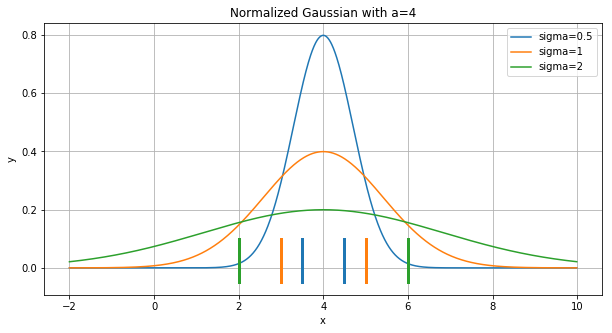

In [21]:
plt.show() # Show the figure right here.